At Santander our mission is to help people and businesses prosper. We are always looking for ways to help our customers understand their financial health and identify which products and services might help them achieve their monetary goals.

Our data science team is continually challenging our machine learning algorithms, working with the global data science community to make sure we can more accurately identify new ways to solve our most common challenge, binary classification problems such as: is a customer satisfied? Will a customer buy this product? Can a customer pay this loan?

In this challenge, we invite Kagglers to help us identify which customers will make a specific transaction in the future, irrespective of the amount of money transacted. The data provided for this competition has the same structure as the real data we have available to solve this problem.

**Source:**https://www.kaggle.com/c/santander-customer-transaction-prediction

**Reference:**https://www.kaggle.com/gpreda/santander-eda-and-prediction \
https://www.kaggle.com/jiweiliu/lgb-2-leaves-augment \
https://www.kaggle.com/sicongfang/eda-feature-engineering \
https://www.kaggle.com/titericz/single-model-using-only-train-counts-information

**metric used = auc(since data is not balanced)**

# Note: Here i am working only on train data dropping the labels for test as aaic team used to work for better visualization

**importing the necessary libraries**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns            #For plots
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
%matplotlib inline

In [0]:
train = pd.read_csv("/content/train.csv.zip")
test = pd.read_csv("/content/test.csv.zip")

In [0]:
train.shape, test.shape

((200000, 202), (200000, 201))

**As we can see from above that train and test, both contains  0.2 million rows.**

In [0]:
train.head(5)

ID_code  target    var_0   var_1  ...  var_196  var_197  var_198  var_199
0  train_0       0   8.9255 -6.7863  ...   7.8784   8.5635  12.7803  -1.0914
1  train_1       0  11.5006 -4.1473  ...   8.1267   8.7889  18.3560   1.9518
2  train_2       0   8.6093 -2.7457  ...  -6.5213   8.2675  14.7222   0.3965
3  train_3       0  11.0604 -2.1518  ...  -2.9275  10.2922  17.9697  -8.9996
4  train_4       0   9.8369 -1.4834  ...   3.9267   9.5031  17.9974  -8.8104

[5 rows x 202 columns]

In [0]:
test.head(5)

ID_code    var_0    var_1    var_2  ...  var_196  var_197  var_198  var_199
0  test_0  11.0656   7.7798  12.9536  ...   4.3654  10.7200  15.4722  -8.7197
1  test_1   8.5304   1.2543  11.3047  ...  -1.4852   9.8714  19.1293 -20.9760
2  test_2   5.4827 -10.3581  10.1407  ...  -7.1086   7.0618  19.8956 -23.1794
3  test_3   8.5374  -1.3222  12.0220  ...   3.9567   9.2295  13.0168  -4.2108
4  test_4  11.7058  -0.1327  14.1295  ...  -5.1612   7.2882  13.9260  -9.1846

[5 rows x 201 columns]

In [0]:
#target = train["target"]

In [0]:
#train = train.drop(["target"], axis=1)

**Checking missing values if any**

In [0]:
train.isnull().sum()

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
var_3      0
var_4      0
var_5      0
var_6      0
var_7      0
var_8      0
var_9      0
var_10     0
var_11     0
var_12     0
var_13     0
var_14     0
var_15     0
var_16     0
var_17     0
var_18     0
var_19     0
var_20     0
var_21     0
var_22     0
var_23     0
var_24     0
var_25     0
var_26     0
var_27     0
          ..
var_170    0
var_171    0
var_172    0
var_173    0
var_174    0
var_175    0
var_176    0
var_177    0
var_178    0
var_179    0
var_180    0
var_181    0
var_182    0
var_183    0
var_184    0
var_185    0
var_186    0
var_187    0
var_188    0
var_189    0
var_190    0
var_191    0
var_192    0
var_193    0
var_194    0
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 202, dtype: int64

**we can see that there is no null value in train**

In [0]:
test.isnull().sum()

ID_code    0
var_0      0
var_1      0
var_2      0
var_3      0
var_4      0
var_5      0
var_6      0
var_7      0
var_8      0
var_9      0
var_10     0
var_11     0
var_12     0
var_13     0
var_14     0
var_15     0
var_16     0
var_17     0
var_18     0
var_19     0
var_20     0
var_21     0
var_22     0
var_23     0
var_24     0
var_25     0
var_26     0
var_27     0
var_28     0
          ..
var_170    0
var_171    0
var_172    0
var_173    0
var_174    0
var_175    0
var_176    0
var_177    0
var_178    0
var_179    0
var_180    0
var_181    0
var_182    0
var_183    0
var_184    0
var_185    0
var_186    0
var_187    0
var_188    0
var_189    0
var_190    0
var_191    0
var_192    0
var_193    0
var_194    0
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 201, dtype: int64

**We can see that there is no null values in test data**

# Lets  describe train

In [0]:
train.describe()

target          var_0  ...        var_198        var_199
count  200000.000000  200000.000000  ...  200000.000000  200000.000000
mean        0.100490      10.679914  ...      15.870720      -3.326537
std         0.300653       3.040051  ...       3.010945      10.438015
min         0.000000       0.408400  ...       6.299300     -38.852800
25%         0.000000       8.453850  ...      13.829700     -11.208475
50%         0.000000      10.524750  ...      15.934050      -2.819550
75%         0.000000      12.758200  ...      18.064725       4.836800
max         1.000000      20.315000  ...      26.079100      28.500700

[8 rows x 201 columns]

# Lets describe test

In [0]:
test.describe()

var_0          var_1  ...        var_198        var_199
count  200000.000000  200000.000000  ...  200000.000000  200000.000000
mean       10.658737      -1.624244  ...      15.869184      -3.246342
std         3.036716       4.040509  ...       3.008717      10.398589
min         0.188700     -15.043400  ...       6.584000     -39.457800
25%         8.442975      -4.700125  ...      13.847275     -11.124000
50%        10.513800      -1.590500  ...      15.943400      -2.725950
75%        12.739600       1.343400  ...      18.045200       4.935400
max        22.323400       9.385100  ...      26.538400      27.907400

[8 rows x 200 columns]

**from this train_vis we are going to visualize  11 features as pair plot because visualizing all at one takes a lot of time**

In [0]:
train_vis = train.iloc[:, 1:13]

In [0]:
train_vis.head(2)

target    var_0   var_1    var_2  ...    var_7   var_8   var_9  var_10
0       0   8.9255 -6.7863  11.9081  ...  18.6266 -4.9200  5.7470  2.9252
1       0  11.5006 -4.1473  13.8588  ...  16.5338  3.1468  8.0851 -0.4032

[2 rows x 12 columns]

# Data Analysis on train data

Number of people transacted the money in future  20098 , ( 10.049 %)
Number of people not transacted the money in future   179902 , ( 89.95100000000001 %)


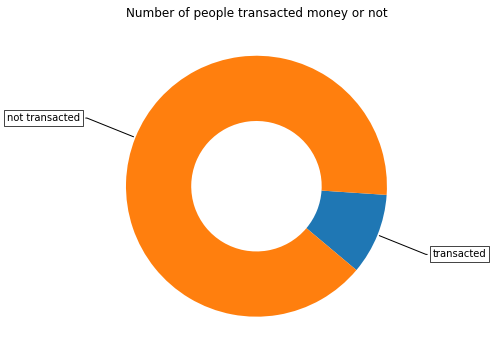

In [0]:
# PROVIDE CITATIONS TO YOUR CODE IF YOU TAKE IT FROM ANOTHER WEBSITE.
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py


y_value_counts = train['target'].value_counts()
print("Number of people transacted the money in future ", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print("Number of people not transacted the money in future  ", y_value_counts[0], ", (", (y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
#above codes will give the%age of approved and not approved project

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
recipe = ["transacted", "not transacted"]

data = [y_value_counts[1], y_value_counts[0]]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Number of people transacted money or not")

plt.show()

**So from the above plot we can observe that the number of people transected the money os about 10% of the total data only.**\
*this is a purely imbalanced data.*

# Visualising with all the features is quite difficult so I am choosing 10 var columns to visualise as pair plot

# PAIR PLOT only for first 10 var_0 to var_10
**we can visualize relationship between two varioables with this**

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


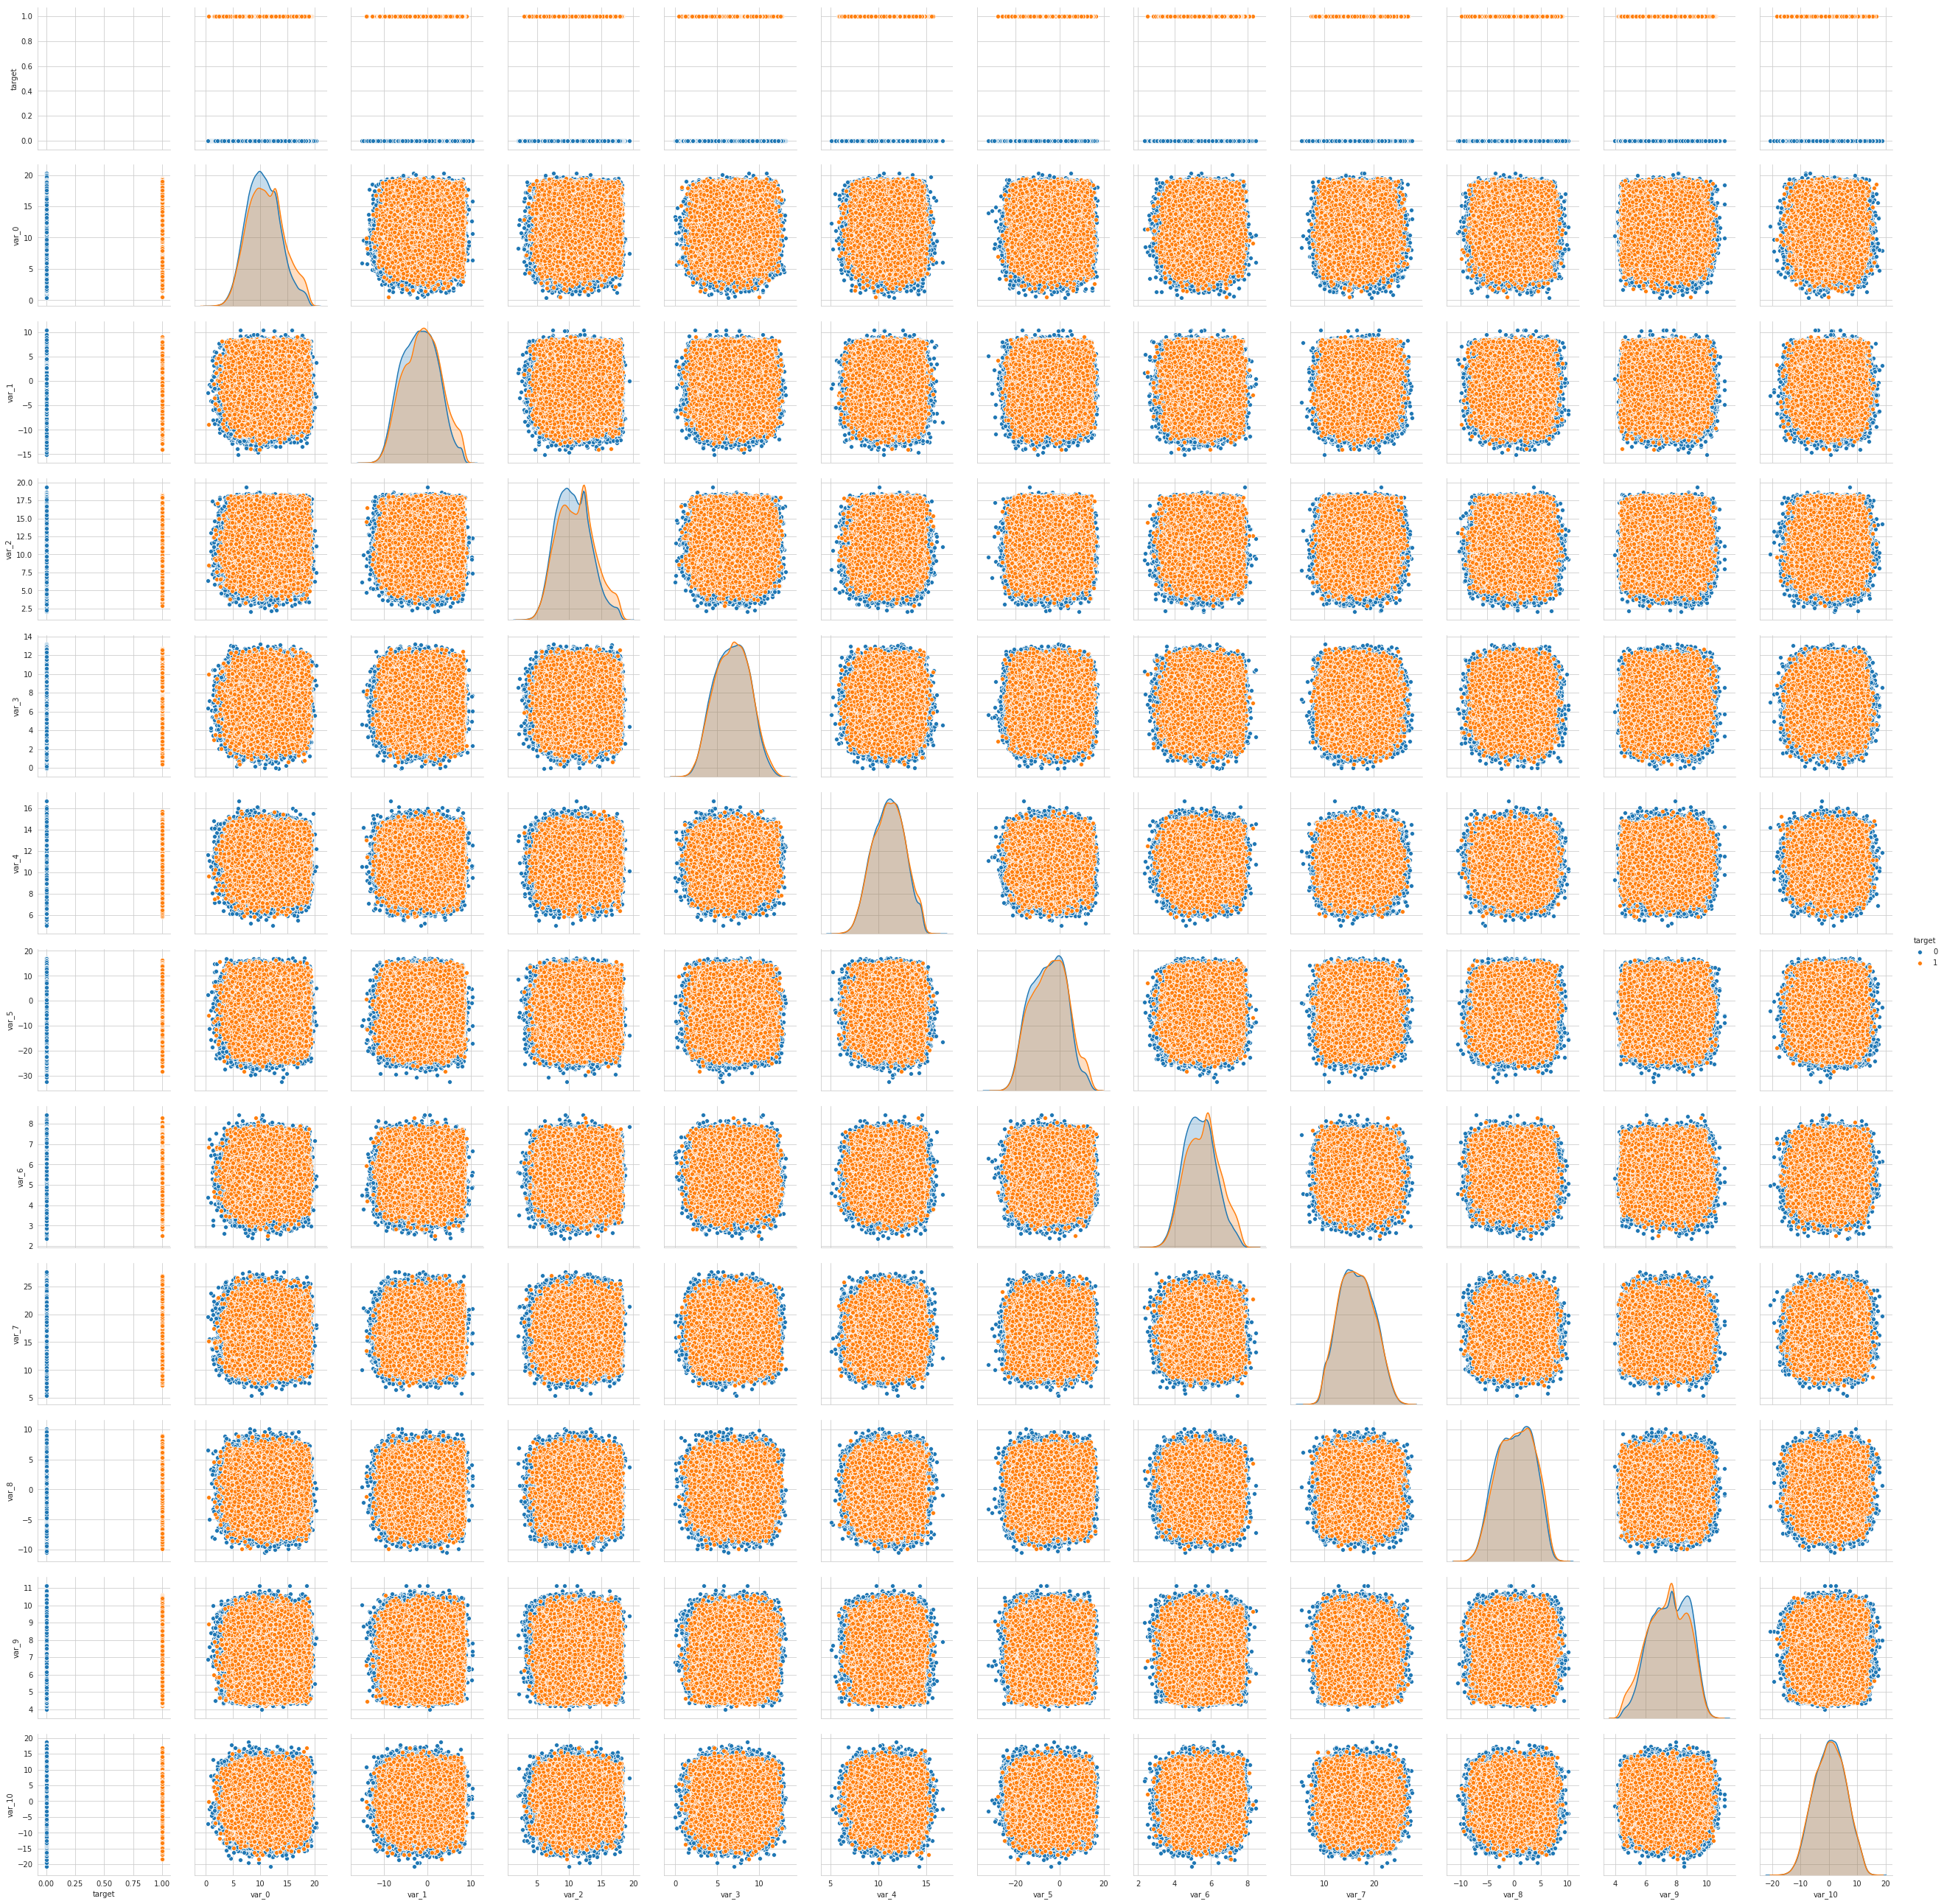

In [0]:
#https://seaborn.pydata.org/generated/seaborn.pairplot.html
plt.close()  #Closing all open window
sns.set_style("whitegrid");
sns.pairplot(train_vis, hue="target", height=3);
plt.show()

**from this few features only we can see that both traget is easily seperable using any of the two features.**\
although the data is imbalanced but easily seperable

# Pdf for all features
https://www.kaggle.com/gpreda/santander-eda-and-prediction

In [0]:
def plot_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(10,10,figsize=(18,22))

    for feature in features:
        i += 1
        plt.subplot(10,10,i)
        sns.distplot(df1[feature], hist=False,label=label1)
        sns.distplot(df2[feature], hist=False,label=label2)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    plt.show();

# first 100

**here I am distributing dataset label wise**

In [0]:
t0 = train.loc[train['target'] == 0]
t1 = train.loc[train['target'] == 1]

<Figure size 432x288 with 0 Axes>

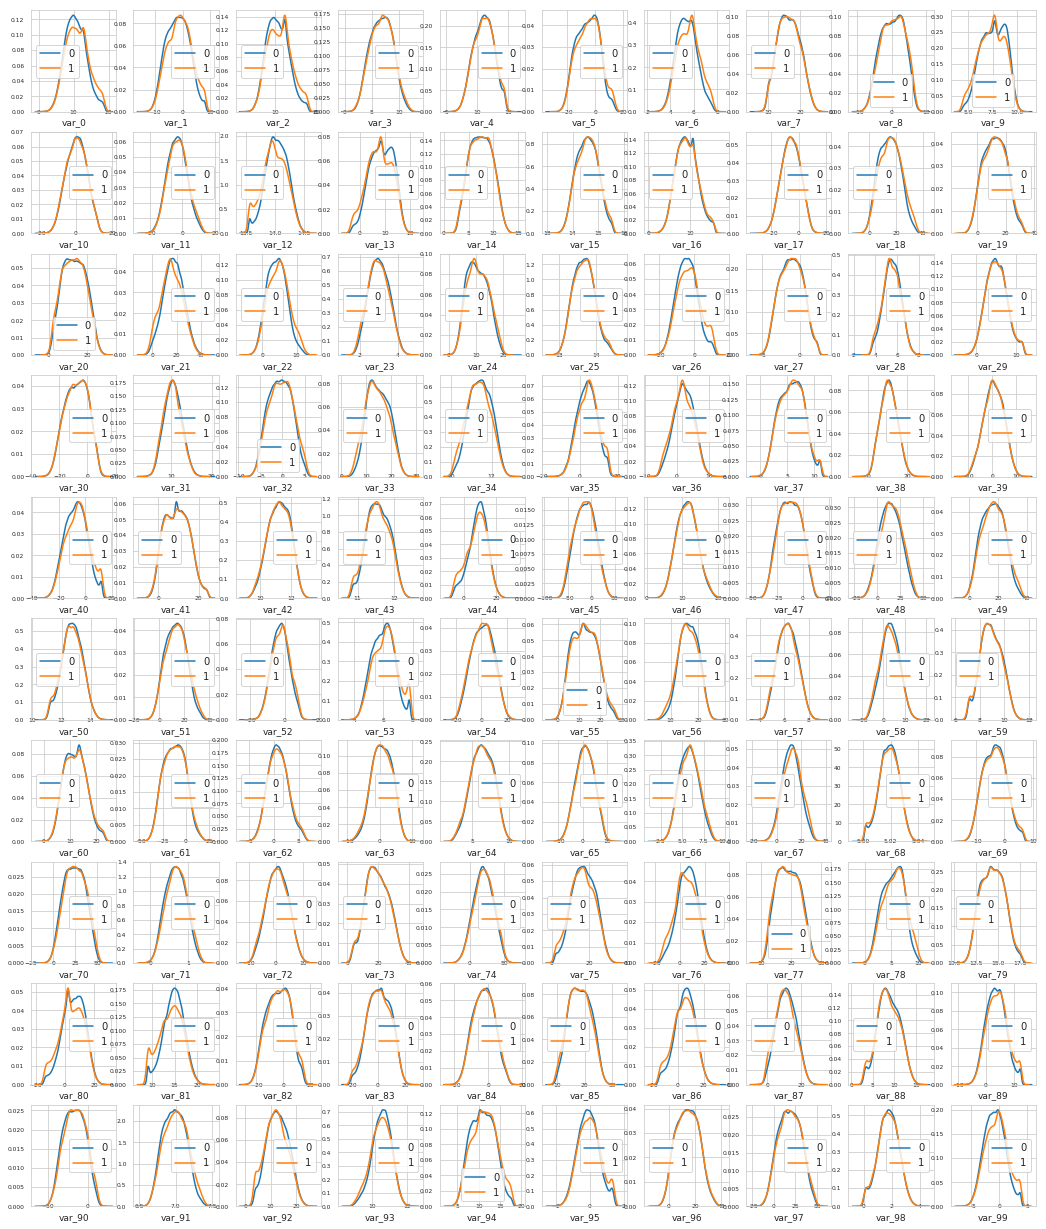

In [0]:
features = train.columns.values[2:102]
plot_feature_distribution(t0, t1, '0', '1', features)

# from features 100 -200

<Figure size 432x288 with 0 Axes>

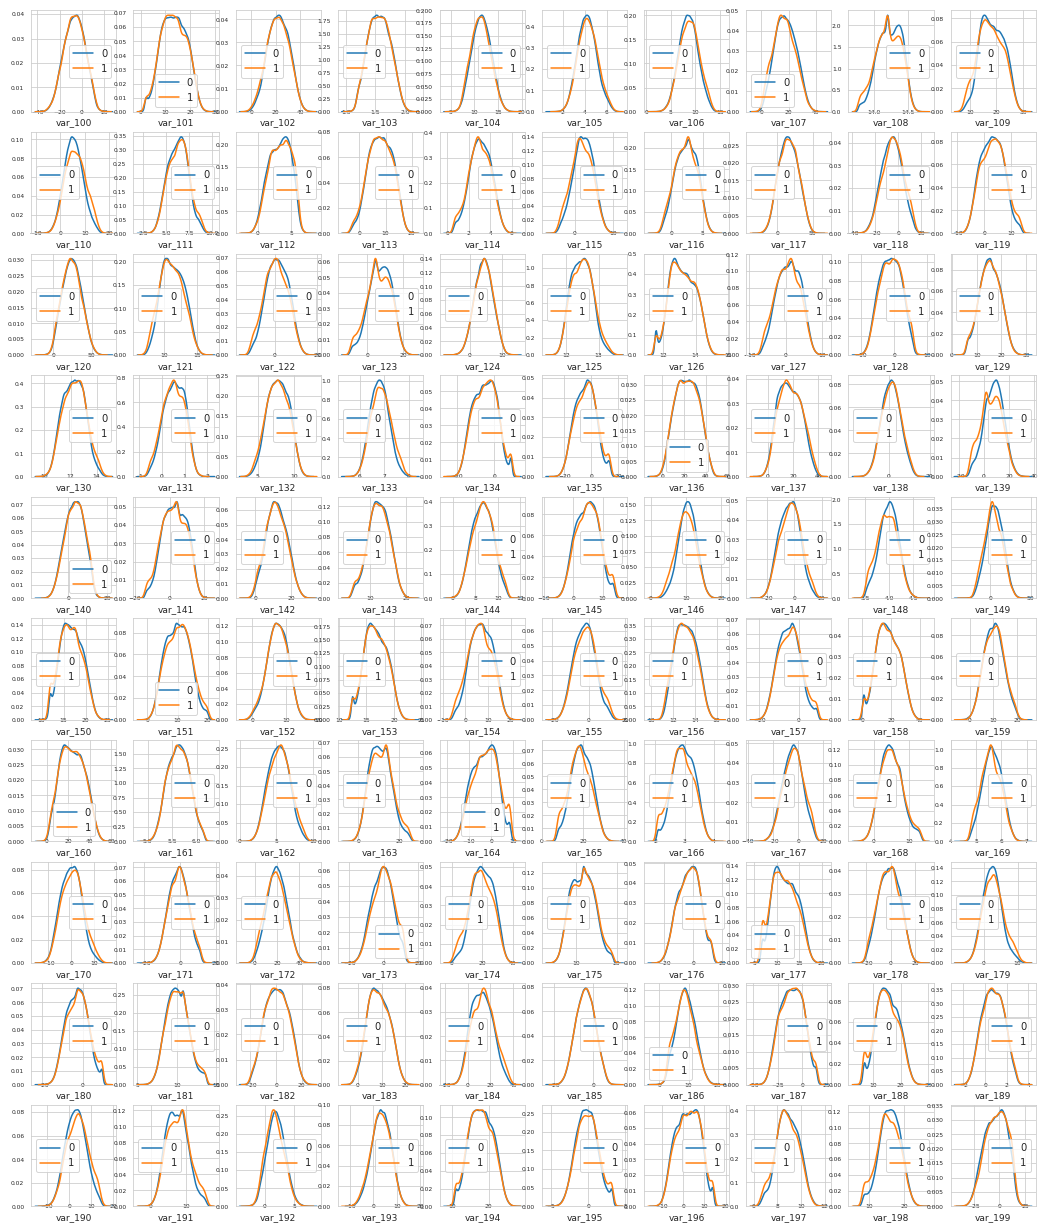

In [0]:
features = train.columns.values[102:202]
plot_feature_distribution(t0, t1, '0', '1', features)

**As we can see from above pdf that there is a lot of different distribution**\
**and for most of the data where label=1 and label=0 follows same distribution**\
**var_10 ,var_11, var_8,  var_65, var_84  ect. follows same distribution like gaussian**\
**var_70, var_60, var_85 ect follows similar distribution**\
**var_80, var_86 etc follows similar distribution.**\
similarly we can see from feature 102 to 202.

# Visualising by tsne

In [0]:
train_5000 = train.head(20000)
y =train_5000["target"]
x = train_5000.iloc[:,2:202].values

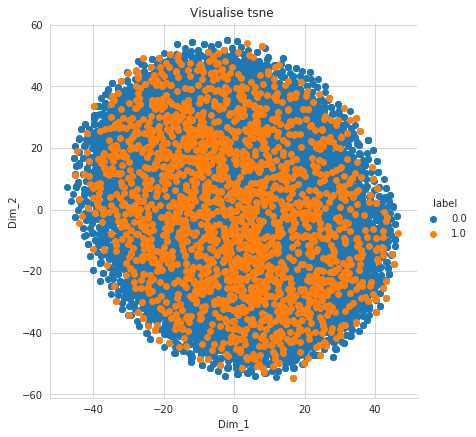

In [0]:
# https://github.com/pavlin-policar/fastTSNE you can try this also, this version is little faster than sklearn 
#reference: aaic tsne
import numpy as np
from sklearn.manifold import TSNE
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt


tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)

X_embedding = tsne.fit_transform(x)
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix

for_tsne = np.vstack((X_embedding.T, y)).T#y.reshape(-1,1)
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dim_1','Dim_2','label'])
# Ploting the result of tsne
sns.FacetGrid(for_tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title("Visualise tsne ")
plt.show()

**from the above tsne plot we can see that label 1 is not much seperable when we visualise it in 2d plot**

# Visualizing mean, median, std, kurtosis, skew, add, min, max, moving average of train and simultaneously doing feature engineering

In [0]:
features_train = train.columns.values[2:202]
features_test = test.columns.values[1:201]
row_mean_train = train[features_train].mean(axis=1)
train["row_mean"] =row_mean_train
row_mean_test = test[features_test].mean(axis=1)
test["row_mean"] = row_mean_test


**Pdf gives the probabily of points lying in a certain range**

[]

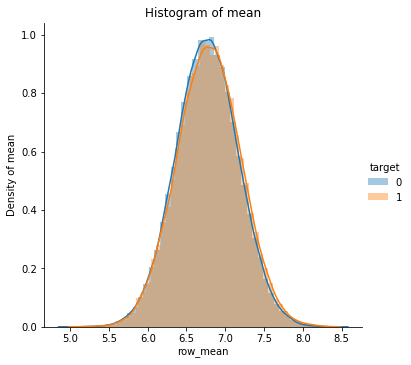

In [0]:
#https://seaborn.pydata.org/generated/seaborn.distplot.html
sns.FacetGrid(train, hue = "target", height = 5)\
             .map(sns.distplot, "row_mean")\
             .add_legend()
plt.title("Histogram of mean")
plt.ylabel("Density of mean")
plt.plot()

**from the above pdf we can say that when mean>6.2 and mean<7 then it is clear that probability of target=1 is high.**

**adding median**

In [0]:
#reference : aaic haberman

In [0]:
row_median_train = train[features_train].median(axis=1)
train["row_median"] =row_median_train
row_median_test = test[features_test].median(axis=1)
test["row_median"] = row_median_test


[]

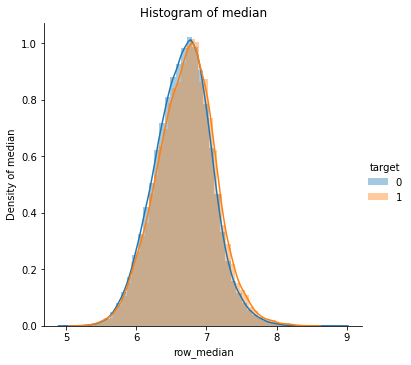

In [0]:
#https://seaborn.pydata.org/generated/seaborn.distplot.html
sns.FacetGrid(train, hue = "target", height = 5)\
             .map(sns.distplot, "row_median")\
             .add_legend()
plt.title("Histogram of median")
plt.ylabel("Density of median")
plt.plot()

**from the above pdf we can see that when median>6 and median<7 , the probability of target==1 is high**

**std**

In [0]:
row_std_train = train[features_train].std(axis=1)
train["row_std"] =row_std_train
row_std_test = test[features_test].std(axis=1)
test["row_std"] = row_std_test


[]

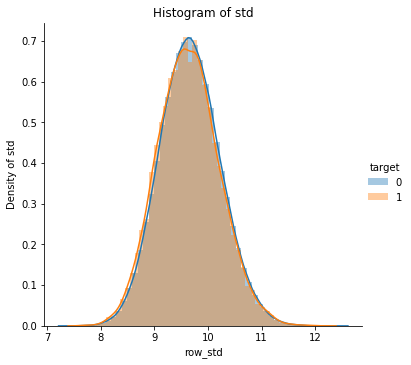

In [0]:
#https://seaborn.pydata.org/generated/seaborn.distplot.html
sns.FacetGrid(train, hue = "target", height = 5)\
             .map(sns.distplot, "row_std")\
             .add_legend()
plt.title("Histogram of std")
plt.ylabel("Density of std")
plt.plot()

**it is clear from the above pdf that when std>9.2 and std<10.2 probability of target==1 is high.**

**min**

In [0]:
row_min_train = train[features_train].min(axis=1)
train["row_min"] =row_min_train
row_min_test = test[features_test].min(axis=1)
test["row_min"] = row_min_test


[]

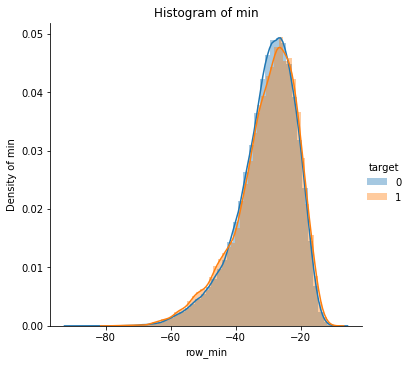

In [0]:
#https://seaborn.pydata.org/generated/seaborn.distplot.html
sns.FacetGrid(train, hue = "target", height = 5)\
             .map(sns.distplot, "row_min")\
             .add_legend()
plt.title("Histogram of min")
plt.ylabel("Density of min")
plt.plot()

**it is clear from the above pdf that when  min<-20 and min>-50 probability of target==1 is high**

**max**

In [0]:
row_max_train = train[features_train].max(axis=1)
train["row_max"] =row_max_train
row_max_test = test[features_test].max(axis=1)
test["row_max"] = row_max_test


[]

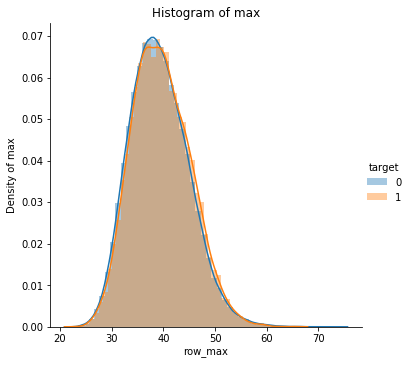

In [0]:
#https://seaborn.pydata.org/generated/seaborn.distplot.html
sns.FacetGrid(train, hue = "target", height = 5)\
             .map(sns.distplot, "row_max")\
             .add_legend()
plt.title("Histogram of max")
plt.ylabel("Density of max")
plt.plot()

**it is clear from the above pdf that when  max>35 and min<45 probability of target==1 is high**

**Skew**

In [0]:
row_skew_train = train[features_train].skew(axis=1)
train["row_skew"] =row_skew_train
row_skew_test = test[features_test].skew(axis=1)
test["row_skew"] = row_skew_test


[]

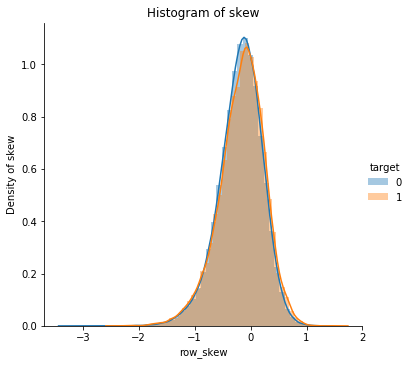

In [0]:
#https://seaborn.pydata.org/generated/seaborn.distplot.html
sns.FacetGrid(train, hue = "target", height = 5)\
             .map(sns.distplot, "row_skew")\
             .add_legend()
plt.title("Histogram of skew")
plt.ylabel("Density of skew")
plt.plot()

**kurtosis**

In [0]:
row_kurt_train = train[features_train].kurtosis(axis=1)
train["row_kurt"] =row_kurt_train
row_kurt_test = test[features_test].kurtosis(axis=1)
test["row_kurt"] = row_kurt_test


[]

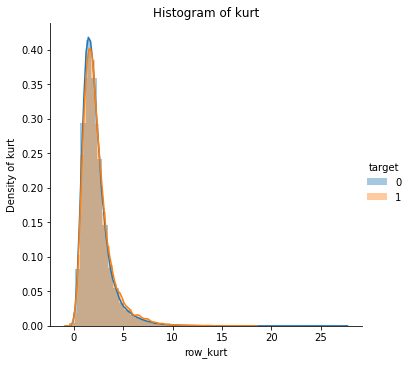

In [0]:
#https://seaborn.pydata.org/generated/seaborn.distplot.html
sns.FacetGrid(train, hue = "target", height = 5)\
             .map(sns.distplot, "row_kurt")\
             .add_legend()
plt.title("Histogram of kurt")
plt.ylabel("Density of kurt")
plt.plot()

**it is clear from the above pdf that when  kurt>2 and kurt<4 probability of target==1 is high**

**sum**

In [0]:
row_sum_train = train[features_train].sum(axis=1)
train["row_sum"] =row_sum_train
row_sum_test = test[features_test].sum(axis=1)
test["row_sum"] = row_sum_test


[]

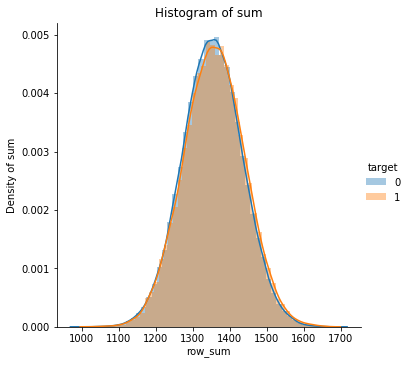

In [0]:
#https://seaborn.pydata.org/generated/seaborn.distplot.html
sns.FacetGrid(train, hue = "target", height = 5)\
             .map(sns.distplot, "row_sum")\
             .add_legend()
plt.title("Histogram of sum")
plt.ylabel("Density of sum")
plt.plot()

**it is clear from the above pdf that when  sum>1250 and sum<1450 probability of target==1 is high**

**moving sum mean**

In [0]:
#https://www.kaggle.com/hjd810/keras-lgbm-aug-feature-eng-sampling-prediction
row_ma_train = train[features_train].apply(lambda x: np.ma.average(x), axis=1)
train["ma"] = row_ma_train
row_ma_test = test[features_test].apply(lambda x: np.ma.average(x), axis=1)
test["ma"] = row_ma_test


In [0]:
#https://seaborn.pydata.org/generated/seaborn.distplot.html
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.ma.average.html
sns.FacetGrid(train, hue = "target", height = 5)\
             .map(sns.distplot, "ma")\
             .add_legend()
plt.title("Histogram of ma")
plt.ylabel("Density of ma")
plt.plot()

[]

**it is clear from the above pdf that when  ma>6.2 and ma<7 probability of target==1 is high**

**Pdf and cdf using kde(Kernal Distribution Estimation)**

In [0]:
t0 = train.loc[train['target'] == 0]
t1 = train.loc[train['target'] == 1]

[1.50081711e-04 2.89046259e-03 2.75650076e-02 1.28225367e-01
 2.94043424e-01 3.22197641e-01 1.72721815e-01 4.59361208e-02
 5.89765539e-03 3.72424987e-04]
[4.9633175  5.31394435 5.6645712  6.01519805 6.3658249  6.71645175
 7.0670786  7.41770545 7.7683323  8.11895915 8.469586  ]
[0.00059707 0.00597074 0.04094935 0.13598368 0.26639467 0.2887352
 0.18260523 0.06398647 0.01293661 0.00184098]
[5.1600995 5.4754376 5.7907757 6.1061138 6.4214519 6.73679   7.0521281
 7.3674662 7.6828043 7.9981424 8.3134805]


Text(0, 0.5, 'percentage')

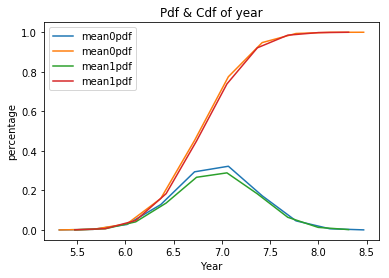

In [0]:
#reference: aaic haberman
counts, bin_edges=np.histogram(t0["row_mean"], bins=10, density=True)
pdf=counts/(sum(counts))
print(pdf);    #this will return 10 values
print(bin_edges);  #this will return 11 values
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label="mean0pdf");
plt.plot(bin_edges[1:], cdf, label="mean0pdf");

counts, bin_edges=np.histogram(t1["row_mean"], bins=10, density=True)
pdf=counts/(sum(counts))
print(pdf);    #this will return 10 values
print(bin_edges);  #this will return 11 values
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label="mean1pdf");
plt.plot(bin_edges[1:], cdf, label="mean1pdf");
plt.legend()
plt.title("Pdf & Cdf of year")
plt.xlabel("Year")
plt.ylabel("percentage")

**from the above pdf and cdf we can say that 90 % of data lie below 7.5**

# Box_plot

[]

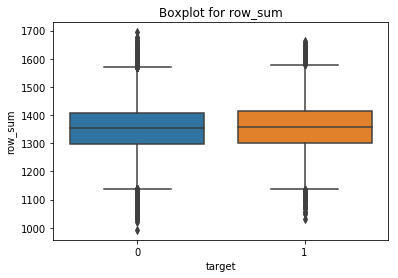

In [0]:
#reference aaic haberman
sns.boxplot(x="target", y="row_sum", data=train)
plt.title("Boxplot for row_sum")
plt.plot()

**distribution according to box plot is also same.**

[]

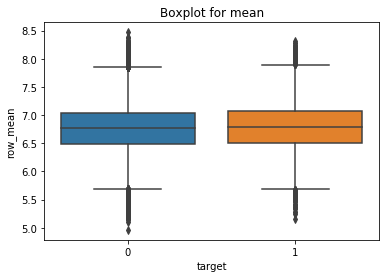

In [0]:
sns.boxplot(x="target", y="row_mean", data=train)
plt.title("Boxplot for mean")
plt.plot()

# Visualize var_13 to var_17

In [0]:
#create a function which makes the plot:
#https://www.kaggle.com/sicongfang/eda-feature-engineering
from matplotlib.ticker import FormatStrFormatter
def visualize_numeric(ax1, ax2, ax3, df, col, target):
    #plot histogram:
    df.hist(column=col,ax=ax1,bins=200)
    ax1.set_xlabel('Histogram')
    
    #plot box-whiskers:
    df.boxplot(column=col,by=target,ax=ax2)
    ax2.set_xlabel('Transactions')
    
    #plot top 10 counts:
    cnt = df[col].value_counts().sort_values(ascending=False)
    cnt.head(10).plot(kind='barh',ax=ax3)
    ax3.invert_yaxis()  # labels read top-to-bottom
#     ax3.yaxis.set_major_formatter(FormatStrFormatter('%.2f')) #somehow not working 
    ax3.set_xlabel('Count')

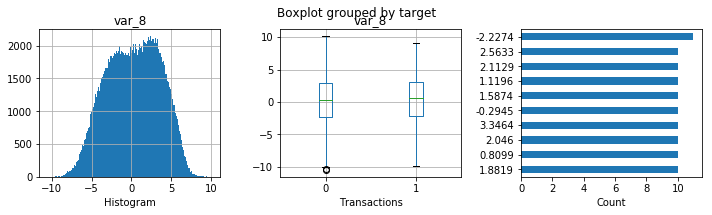

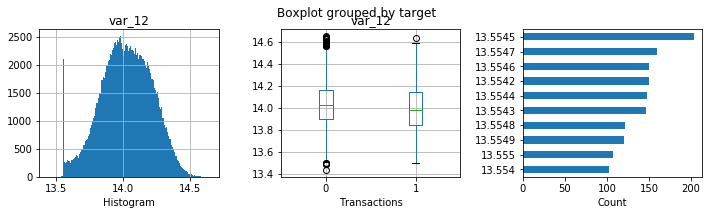

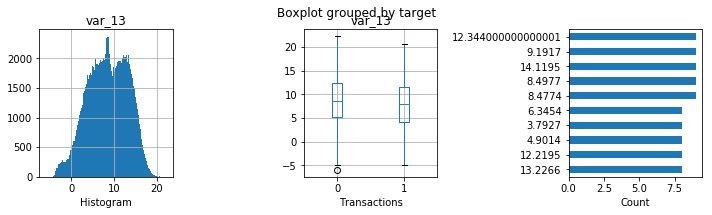

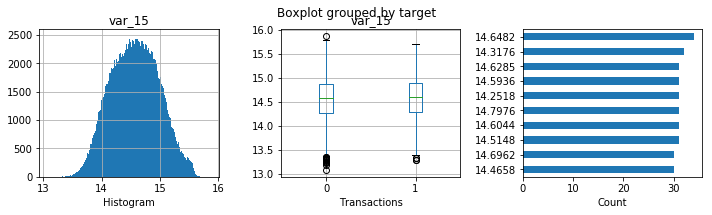

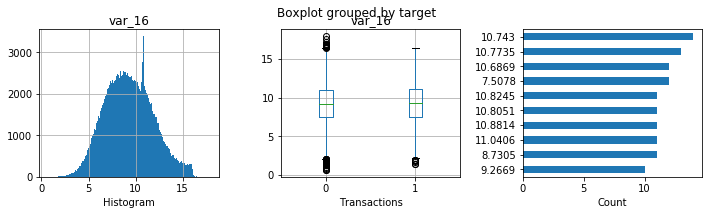

In [0]:
##https://www.kaggle.com/sicongfang/eda-feature-engineering
for col in list(train.columns[10:20]):
    fig, axes = plt.subplots(1, 3,figsize=(10,3))
    ax11 = plt.subplot(1, 3, 1)
    ax21 = plt.subplot(1, 3, 2)
    ax31 = plt.subplot(1, 3, 3)
    fig.suptitle('Feature: %s'%col,fontsize=5)
    visualize_numeric(ax11,ax21,ax31,train,col,'target')
    plt.tight_layout()

**->from the above we can conclude that data follows different distribution**\
**->from the boxplot we can assume that for var_11 50% of its values lies with -8 to 0. and for for var_10 50% of its value lie within -5 to 5 and like wise for others we can conclude from boxplot**\
**->from the above count plot we can see that maximum number of count of some particular value is variable in nature. **

In [0]:
train.head(2)

ID_code  target    var_0   var_1  ...  row_skew  row_kurt    row_sum        ma
0  train_0       0   8.9255 -6.7863  ...  0.101580  1.331023  1456.3182  7.281591
1  train_1       0  11.5006 -4.1473  ... -0.351734  4.110215  1415.3636  7.076818

[2 rows x 211 columns]

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Now saving all the feature engineered data to train_santander.csv

In [0]:
train.to_csv("/content/drive/My Drive/train_santander.csv")

In [0]:
test.to_csv("/content/drive/My Drive/test_santander.csv")

**importing necessary libraries**

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression


**working only on train datasets just to see how well my model is doing.**

In [0]:
train = pd.read_csv("/content/drive/My Drive/train_santander.csv")
#test = pd.read_csv("/content/drive/My Drive/test_santander.csv")

In [0]:
train.head(2)

Unnamed: 0  ID_code  target  ...  row_kurt    row_sum        ma
0           0  train_0       0  ...  1.331023  1456.3182  7.281591
1           1  train_1       0  ...  4.110215  1415.3636  7.076818

[2 rows x 212 columns]

**as we can see from above that I have successfully added feature engineered features in train data**

In [0]:
#target values
target = train["target"].values

In [0]:
#imp features from column 3 to 212
train = train.iloc[:,3:212]

In [0]:
train.shape

(200000, 209)

**Dividing train into train and test**

In [0]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split
train, test, y_train, y_test = train_test_split(train, target, test_size=0.4)


In [0]:
train.head(2)

var_0   var_1    var_2  ...  row_kurt    row_sum        ma
41283   10.9731 -4.6904  12.0139  ...  2.436583  1332.3101  6.661551
110029   9.8618 -7.5704  11.2805  ...  3.390167  1305.6882  6.528441

[2 rows x 209 columns]

In [0]:
test.head(2)

var_0   var_1    var_2  ...  row_kurt    row_sum        ma
52412   6.3458 -5.5601  12.5416  ...  1.783650  1409.0901  7.045450
10937  10.3105 -5.4767  11.2129  ...  4.724142  1339.3433  6.696716

[2 rows x 209 columns]

In [0]:
#https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
scaler = scaler.fit(train) 
train = scaler.transform(train)
test = scaler.transform(test)

# Now applying different ML algorithms

# Logistic

**Defining necessary functions.**

In [0]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

In [0]:
#From facebook recommendation applied this code is taken and modified according to use
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    TN = C[0,0]       
    FP = C[0,1]  
    FN = C[1,0]
    TP = C[1,1]
    print("True Positive",TP)
    print("False Negative",FN)
    print("False Positive",FP)
    print("True Negative",TN)
    
    
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(30,6))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("Navy", as_cmap=True)#https://stackoverflow.com/questions/37902459/seaborn-color-palette-as-matplotlib-colormap
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    
    plt.show()

In [0]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [0]:
#As mentioned in logistic regression assignment I am changing alpha to log to plot a goog graph
import numpy as np
def log_alpha(al):
    alpha=[]
    for i in al:
        a=np.log(i)
        alpha.append(a)
    return alpha    

# Logistic Regression

Model with best parameters :
 SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
0.0001


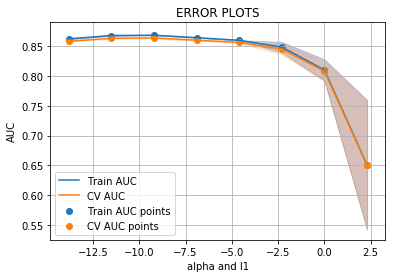

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score

lg = SGDClassifier(loss='log', class_weight='balanced', penalty="l2")
alpha=[0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]
parameters = {'alpha':alpha}
clf = GridSearchCV(lg, parameters, cv=3, scoring='roc_auc', n_jobs=-1, return_train_score=True,)
clf.fit(train, y_train)

print("Model with best parameters :\n",clf.best_estimator_)

alpha = log_alpha(alpha)


best_alpha = clf.best_estimator_.alpha
#best_split = clf.best_estimator_.min_samples_split

print(best_alpha)
#print(best_split)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(alpha, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(alpha,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(alpha, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(alpha,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(alpha, train_auc, label='Train AUC points')
plt.scatter(alpha, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha and l1")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

**From the above plot it is clearly visible that when alpha=0.0001 we have maximum auc.**

# Making final models with best alpha and penalty

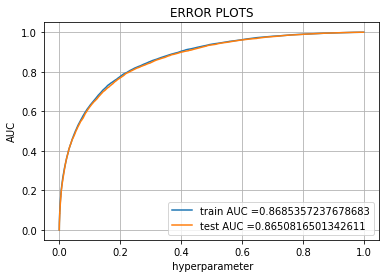

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV

lg = SGDClassifier(loss='log', alpha=best_alpha, penalty="l2", class_weight="balanced")
#lg.fit(train_1, project_data_y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

sig_clf = CalibratedClassifierCV(lg, method="isotonic")
lg = sig_clf.fit(train, y_train)


y_train_pred = lg.predict_proba(train)[:,1]   
y_test_pred = lg.predict_proba(test)[:,1] 

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel(" hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

**So the maximum auc here is 0.865**

# Confusion Matrix with using map

Train confusion_matrix
the maximum value of tpr*(1-fpr) 0.24999986924548293 for threshold 0.033
True Positive 11404
False Negative 742
False Positive 53966
True Negative 53888


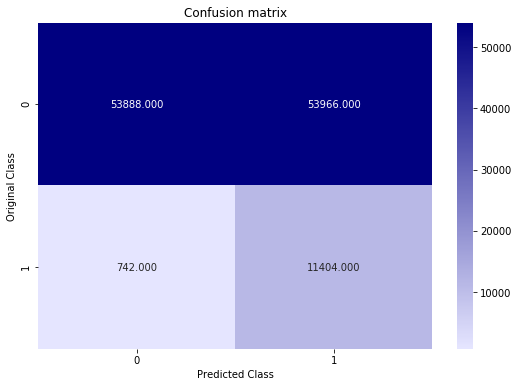

In [0]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,predict(y_train_pred, tr_thresholds, train_fpr, train_fpr))


Test confusion_matrix
the maximum value of tpr*(1-fpr) 0.24999986924548293 for threshold 0.033
True Positive 7438
False Negative 514
False Positive 35910
True Negative 36138


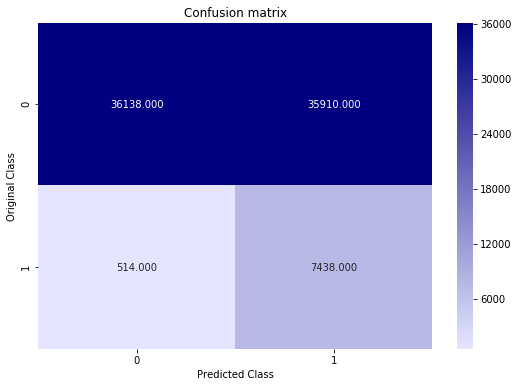

In [0]:
print('Test confusion_matrix')
plot_confusion_matrix(y_test,predict(y_test_pred, tr_thresholds, train_fpr, train_fpr))

# SVM

Model with best parameters :
 SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
0.0001


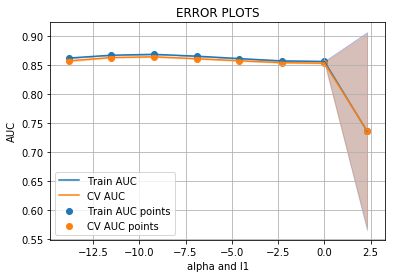

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score

svm = SGDClassifier(loss='hinge', class_weight='balanced', penalty="l2")
alpha=[0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]
parameters = {'alpha':alpha}
clf = GridSearchCV(svm, parameters, cv=3, scoring='roc_auc', n_jobs=-1, return_train_score=True,)
clf.fit(train, y_train)

print("Model with best parameters :\n",clf.best_estimator_)

alpha = log_alpha(alpha)


best_alpha = clf.best_estimator_.alpha
#best_split = clf.best_estimator_.min_samples_split

print(best_alpha)
#print(best_split)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(alpha, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(alpha,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(alpha, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(alpha,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(alpha, train_auc, label='Train AUC points')
plt.scatter(alpha, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha and l1")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

**from the above auc plot it is clearly visible that when auc alpha = 0.0001 , we have maximum auc**

# Making final models with best alpha and penalty

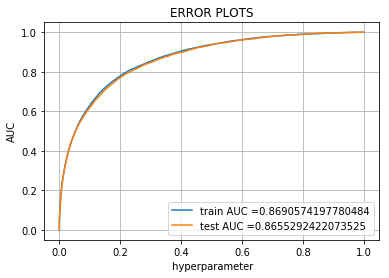

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV

svm = SGDClassifier(loss='hinge', alpha=best_alpha, penalty="l2", class_weight="balanced")
#svm.fit(train_1, project_data_y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

sig_clf = CalibratedClassifierCV(svm, method="isotonic")
svm = sig_clf.fit(train, y_train)


y_train_pred = svm.predict_proba(train)[:,1]   
y_test_pred = svm.predict_proba(test)[:,1] 

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel(" hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

**so from the above plot we can see tha  test auc is 0.865**

# Confusion Matrix with using map

Train confusion_matrix
the maximum value of tpr*(1-fpr) 0.24999788102032108 for threshold 0.031
True Positive 11389
False Negative 757
False Positive 53770
True Negative 54084


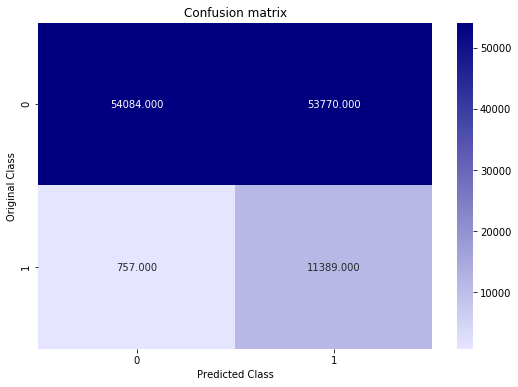

In [0]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,predict(y_train_pred, tr_thresholds, train_fpr, train_fpr))


Test confusion_matrix
the maximum value of tpr*(1-fpr) 0.24999788102032108 for threshold 0.031
True Positive 7442
False Negative 510
False Positive 35846
True Negative 36202


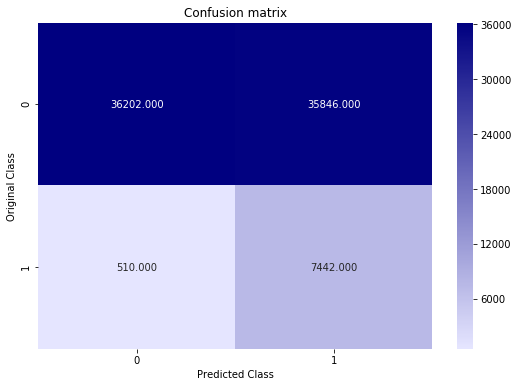

In [0]:
print('Test confusion_matrix')
plot_confusion_matrix(y_test,predict(y_test_pred, tr_thresholds, train_fpr, train_fpr))

# Naive Bayes

Model with best parameters :
 MultinomialNB(alpha=1e-05, class_prior=None, fit_prior=False)


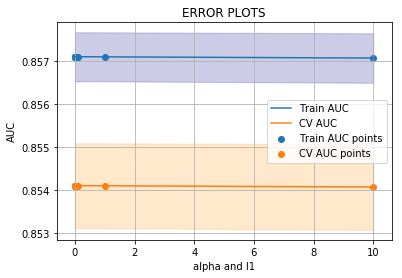

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
naive = MultinomialNB(fit_prior=False)
alpha=[0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]
parameters = {'alpha':alpha}
clf = GridSearchCV(naive, parameters, cv=3, scoring='roc_auc', return_train_score=True)
clf.fit(train, y_train)

print("Model with best parameters :\n",clf.best_estimator_)

train_auc= list(clf.cv_results_['mean_train_score'])
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = list(clf.cv_results_['mean_test_score']) 
cv_auc_std= clf.cv_results_['std_test_score']

best_alpha=clf.best_estimator_.alpha

alpha = log_alpha(alpha)

plt.plot(alpha, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(alpha,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(alpha, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(alpha,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(alpha, train_auc, label='Train AUC points')
plt.scatter(alpha, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha and l1")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

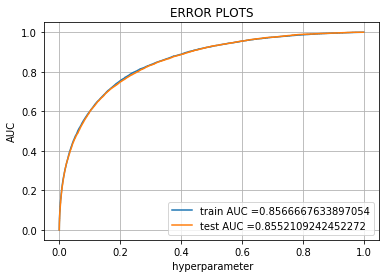

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

naive = MultinomialNB(alpha=best_alpha, fit_prior=False)
naive.fit(train, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = naive.predict_proba(train)[:,1]    
y_test_pred = naive.predict_proba(test)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel(" hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

**from the above plot we can say that test auc is 0.855**

# Confusion Matrix using heat map

Train confusion_matrix
the maximum value of tpr*(1-fpr) 0.2499999854717203 for threshold 0.486
True Positive 11266
False Negative 880
False Positive 53914
True Negative 53940


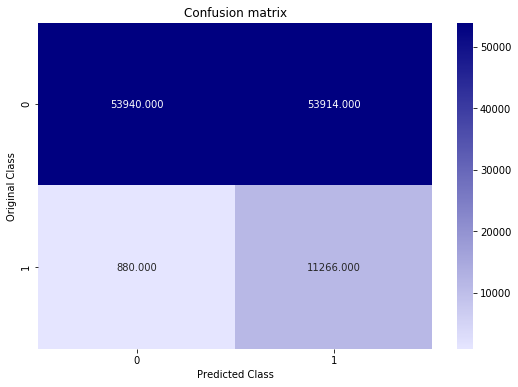

In [0]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,predict(y_train_pred, tr_thresholds, train_fpr, train_fpr))


Test confusion_matrix
the maximum value of tpr*(1-fpr) 0.2499999854717203 for threshold 0.486
True Positive 7376
False Negative 576
False Positive 35751
True Negative 36297


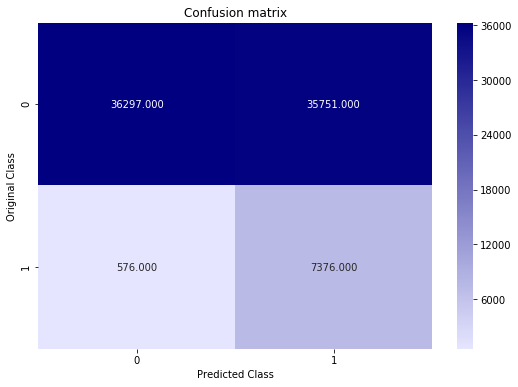

In [0]:
print('Test confusion_matrix')
plot_confusion_matrix(y_test,predict(y_test_pred, tr_thresholds, train_fpr, train_fpr))

# Light GbM
https://www.kaggle.com/gpreda/santander-eda-and-prediction

In [0]:
train = pd.read_csv("/content/drive/My Drive/train_santander.csv")

In [0]:
from sklearn.model_selection import train_test_split
train, test, y_train, y_test = train_test_split(train, target, test_size=0.4)

In [0]:
#taking all the columns except idcode, target, unnamed0
features = [c for c in train.columns if c not in ['ID_code', 'target',"Unnamed:0"]]
target = train['target']

**importing necessary libraries**

In [0]:
import gc
import os
import logging
import datetime
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import lightgbm as lgb
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold
warnings.filterwarnings('ignore')

In [0]:
#setting parameters
param = {
    'bagging_freq': 5,
    'bagging_fraction': 0.4,
    'boost_from_average':'false',
    'boost': 'gbdt',
    'feature_fraction': 0.05,
    'learning_rate': 0.01,
    'max_depth': -1,  
    'metric':'auc',
    'min_data_in_leaf': 80,
    'min_sum_hessian_in_leaf': 10.0,
    'num_leaves': 13,
    'num_threads': 8,
    'tree_learner': 'serial',
    'objective': 'binary', 
    'verbosity': 1
}


In [0]:
#making 10 folds
folds = StratifiedKFold(n_splits=10, shuffle=False, random_state=44000)
oof = np.zeros(len(train))
predictions = np.zeros(len(test))
feature_importance_df = pd.DataFrame()

for fold_, (trn_idx, val_idx) in enumerate(folds.split(train.values, target)):
    print("Fold {}".format(fold_))
    trn_data = lgb.Dataset(train.iloc[trn_idx][features], label=target.iloc[trn_idx])
    val_data = lgb.Dataset(train.iloc[val_idx][features], label=target.iloc[val_idx])

    num_round = 1000000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=1000, early_stopping_rounds = 3000)
    oof[val_idx] = clf.predict(train.iloc[val_idx][features], num_iteration=clf.best_iteration)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    predictions += clf.predict(test[features], num_iteration=clf.best_iteration) / folds.n_splits

print("CV score: {:<8.5f}".format(roc_auc_score(target, oof)))

Fold 0
Training until validation scores don't improve for 3000 rounds.
[1000]	training's auc: 0.91012	valid_1's auc: 0.891048
[2000]	training's auc: 0.922393	valid_1's auc: 0.898032
[3000]	training's auc: 0.93073	valid_1's auc: 0.90145
[4000]	training's auc: 0.93779	valid_1's auc: 0.902904
[5000]	training's auc: 0.943841	valid_1's auc: 0.903862
[6000]	training's auc: 0.949329	valid_1's auc: 0.904328
[7000]	training's auc: 0.954276	valid_1's auc: 0.904513
[8000]	training's auc: 0.95882	valid_1's auc: 0.904236
[9000]	training's auc: 0.963171	valid_1's auc: 0.903923
Early stopping, best iteration is:
[6543]	training's auc: 0.952048	valid_1's auc: 0.904637
Fold 1
Training until validation scores don't improve for 3000 rounds.
[1000]	training's auc: 0.910776	valid_1's auc: 0.87999
[2000]	training's auc: 0.923381	valid_1's auc: 0.887051
[3000]	training's auc: 0.931882	valid_1's auc: 0.889855
[4000]	training's auc: 0.938715	valid_1's auc: 0.891421
[5000]	training's auc: 0.944728	valid_1's auc

**from the above we can say taht lightgbm has performed well than all the other models. auc reaching to 0.90**

# Important features in decending order.

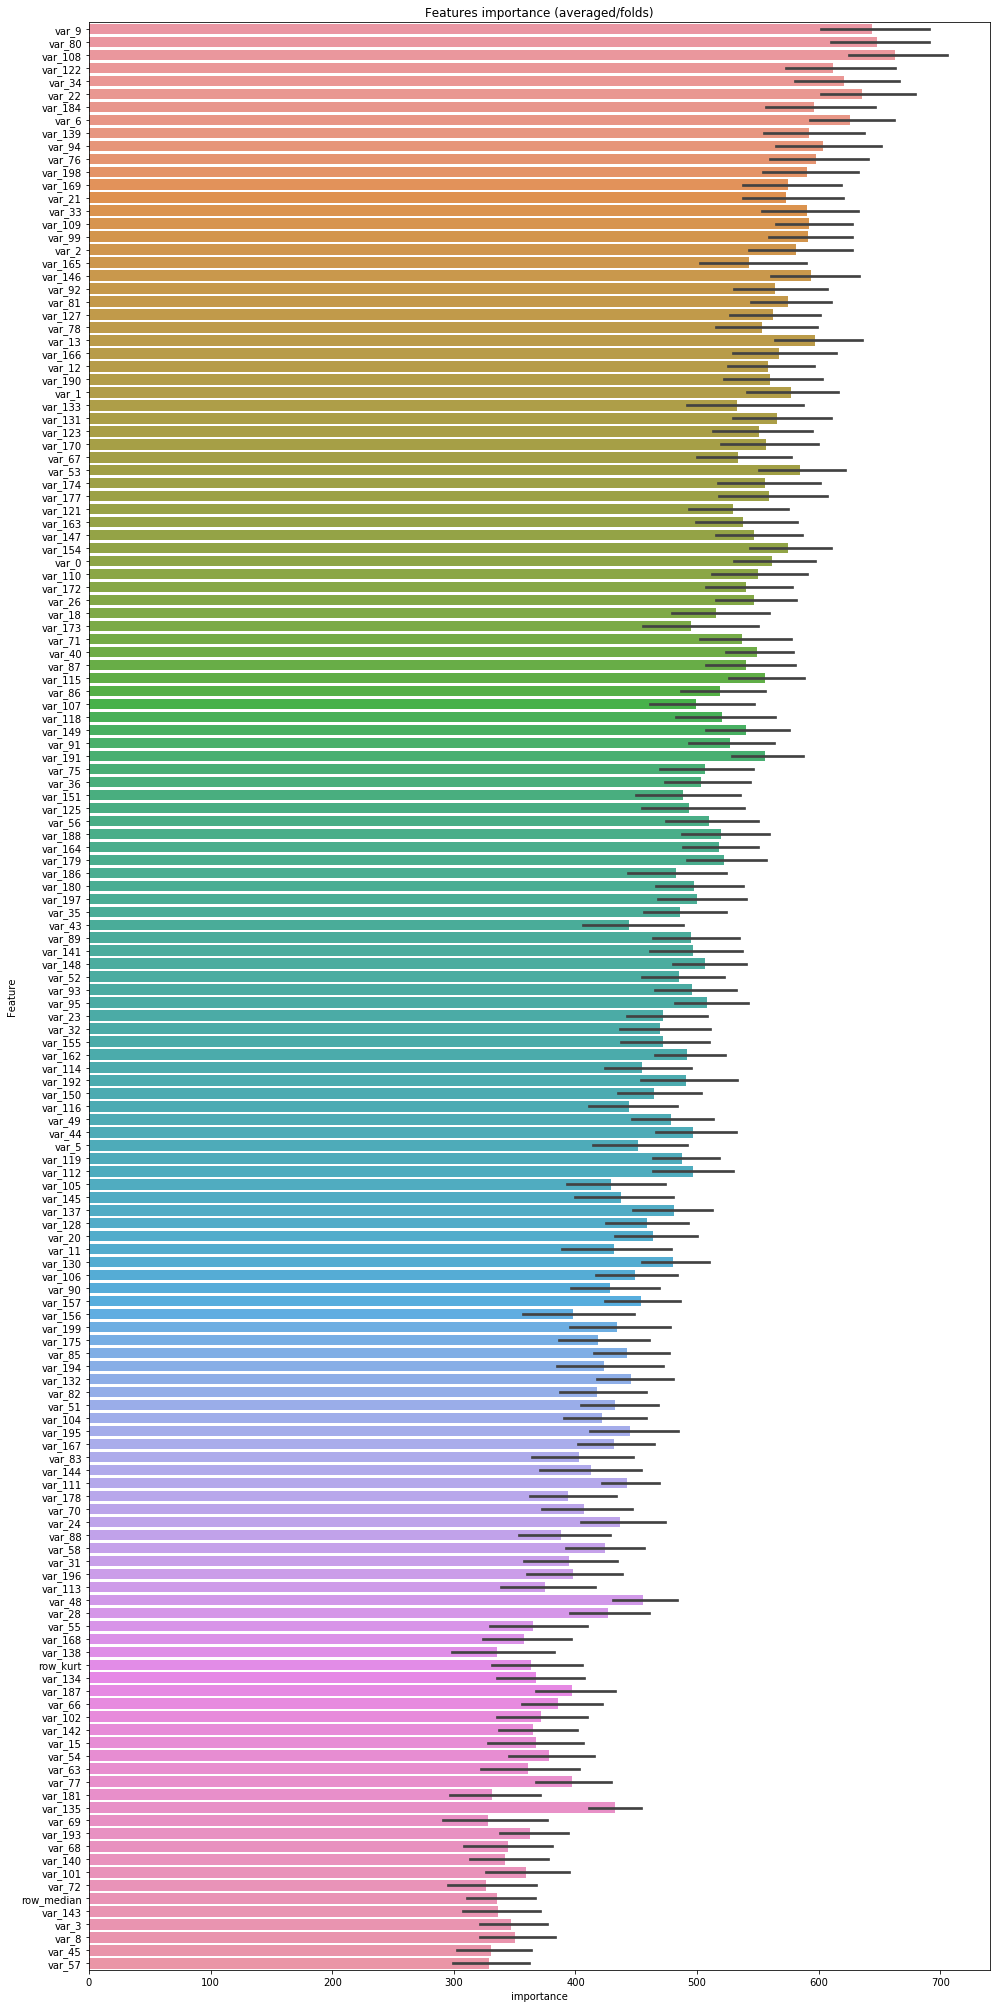

In [0]:
cols = (feature_importance_df[["Feature", "importance"]]
        .groupby("Feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:150].index)
best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]

plt.figure(figsize=(14,28))
#plotting a bar plot where y represents features and x represents its importance.
sns.barplot(x="importance", y="Feature", data=best_features.sort_values(by="importance",ascending=False))
plt.title('Features importance (averaged/folds)')
plt.tight_layout()
plt.savefig('FI.png')

# PrettyTable

In [0]:
#http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

x = PrettyTable()
x.field_names =["Models","Test auc"]
x.add_row(["Logistic ",0.865])
x.add_row(["SVM ",0.865])
x.add_row(["Naive ",0.85])
x.add_row(["LightGbm",0.90])

print(x)

+-----------+----------+
|   Models  | Test auc |
+-----------+----------+
| Logistic  |  0.865   |
|    SVM    |  0.865   |
|   Naive   |   0.85   |
|  LightGbm |   0.9    |
+-----------+----------+


# Final model with full dataset with submission.

**importing dataset from drive.**

In [0]:
train = pd.read_csv("/content/drive/My Drive/train_santander.csv")
test = pd.read_csv("/content/drive/My Drive/test_santander.csv")

In [0]:
train.head(2)

Unnamed: 0  ID_code  target  ...  row_kurt    row_sum        ma
0           0  train_0       0  ...  1.331023  1456.3182  7.281591
1           1  train_1       0  ...  4.110215  1415.3636  7.076818

[2 rows x 212 columns]

In [0]:
test.head(2)

Unnamed: 0 ID_code    var_0   var_1  ...  row_skew  row_kurt    row_sum        ma
0           0  test_0  11.0656  7.7798  ... -0.088518  1.871262  1416.6404  7.083202
1           1  test_1   8.5304  1.2543  ... -0.559785  3.391068  1249.6860  6.248430

[2 rows x 211 columns]

# Credit: https://www.kaggle.com/titericz/single-model-using-only-train-counts-information
**I thought of trying magic as done in other kernels but this kernal was much more interesting**\
**because in this values_count() is used in a simple and more readable way.**\
**leaderboard score after implementing this.**\
****
**Public: 0.91497**\
**Private: 0.91433**
****

**taking only those features whose name starts with var, like var_0, var_1 etc.**

In [0]:
features = [x for x in train.columns if x.startswith("var")]

In [0]:
#https://www.kaggle.com/titericz/single-model-using-only-train-counts-information

**np.corrcoef return Pearson product-moment correlation coefficients and if it is less than zero then reverse the value of train and test.**

In [0]:
#Reverse some features.
#Not really necessary for LGB, but helps a little
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html
for var in features:
    if np.corrcoef( train['target'], train[var] )[1][0] < 0:
        train[var] = train[var] * -1
        test[var]  = test[var]  * -1

**value_counts() counts the number of time a variable has occured**\
**once we got the value count then we put that into a dictionary with**\
**keys as variabe and values as number of count.**

In [0]:
#count train values to split Rare/NonRare values
var_stats = {}
for var in features:
    var_stats[var] = train[var].value_counts()

**printing the top 10 counts of var_0**

In [0]:
var_stats["var_0"].head(10)

13.0656    11
8.6649     11
10.6829    11
11.9590    10
8.9425     10
10.7369    10
12.9271    10
9.5114     10
10.9468    10
8.9129     10
Name: var_0, dtype: int64

# Defining the functions

**1. logit() which gives the difference of log(p) and log(1-p)**\
**2. var_to_features which creates a new dataframe\
     and of shape(200000,4) and coulmn name as var, hist, feature it and var_rank**

In [0]:
def logit(p):
    return np.log(p) - np.log(1 - p)

def var_to_feat(vr, var_stats, feat_id ):
    new_df = pd.DataFrame()
    new_df["var"] = vr.values
    new_df["hist"] = pd.Series(vr).map(var_stats)
    new_df["feature_id"] = feat_id
    new_df["var_rank"] = new_df["var"].rank()/200000.
    #print(new_df.shape)
    return new_df.values

**creating a target of shape (40000000,) i.e 4 crores**

In [0]:
TARGET = np.array( list(train['target'].values) * 200 )
TARGET.shape

(40000000,)

In [0]:
TARGET

array([0, 0, 0, ..., 0, 0, 0])

# Train

**here the idea is appending each 200000 rors 200 times that makes is 4 crore rows and predicting for each individually and then reshaping back to (200000, 200)**

In [0]:
#initializing a empty list named TRAIN 
TRAIN = []
#initializing an empty dictionary var_mean
#this will contain mean value of counts
var_mean = {}
#this will contain variance of counts
#initializing an empty dictionary var_var
var_var  = {}
for var in features:
    #for all column in features
    #this below tmp wii be of shape (200000,4)
    tmp = var_to_feat(train[var], var_stats[var], int(var[4:]) )
    #putting mean of var with column as keys and mean with values.
    var_mean[var] = np.mean(tmp[:,0]) 
    #putting variance of var with column as keys and mean with values.
    var_var[var]  = np.var(tmp[:,0])
    #normalizing all tmp and putting that in tmp again
    tmp[:,0] = (tmp[:,0]-var_mean[var])/var_var[var]
    #appending everything in train
    TRAIN.append( tmp )
#this will stack in vertically    
TRAIN = np.vstack( TRAIN )
#taking target values
target = train['target'].values
#deleting train
del train
#garbaze collector deallocates the space
#https://www.geeksforgeeks.org/garbage-collection-python/
_=gc.collect()

print( TRAIN.shape, len( TARGET ) )

(40000000, 4) 40000000


**we can see there are 4 column in train**

In [0]:
TRAIN[0,:]

array([-0.1898334,  6.       ,  0.       ,  0.3043175])

# Light gbm

**choosing the best parameters**

In [0]:
#https://medium.com/@pushkarmandot/https-medium-com-pushkarmandot-what-is-lightgbm-how-to-implement-it-how-to-fine-tune-the-parameters-60347819b7fc
# https://www.kaggle.com/titericz/single-model-using-only-train-counts-information
model = lgb.LGBMClassifier(**{
     'learning_rate': 0.03,
     'num_leaves': 31,
     'max_bin': 1023,
     'min_child_samples': 1000,
     'feature_fraction': 1.0,
     'bagging_freq': 1,
     'bagging_fraction': 0.85,
     'objective': 'binary',
     'n_jobs': -1,
     'n_estimators':200,})

# Training the model

In [0]:
#taking a total of 10 folds
NFOLDS = 10
predtrain = np.zeros( len(TARGET) )
MODELS = []
skf = StratifiedKFold(n_splits=NFOLDS, shuffle=True, random_state=11111)
for fold_, (train_indexes, valid_indexes) in enumerate(skf.split(TRAIN, TARGET)):
    print('Fold:', fold_ )
    model = model.fit( TRAIN[train_indexes], TARGET[train_indexes],
                      eval_set = (TRAIN[valid_indexes], TARGET[valid_indexes]),
                      verbose = 100,
                      eval_metric='auc',
                      early_stopping_rounds=20,
                      categorical_feature = [2] )
    MODELS.append( model )
    predtrain[valid_indexes] = model.predict_proba( TRAIN[valid_indexes] )[:,1] 

#Reshape to original format 200k x 200
pred = np.reshape( predtrain , (200000,200) , order='F' )
#Use logit for better performance
print( NFOLDS,'-Fold CV AUC:',roc_auc_score( target, np.mean( logit(pred),axis=1)  ) )
_=gc.collect()

Fold: 0
Training until validation scores don't improve for 20 rounds.
Early stopping, best iteration is:
[72]	valid_0's auc: 0.528425	valid_0's binary_logloss: 0.325237
Fold: 1
Training until validation scores don't improve for 20 rounds.
[100]	valid_0's auc: 0.528451	valid_0's binary_logloss: 0.325221
Early stopping, best iteration is:
[138]	valid_0's auc: 0.528489	valid_0's binary_logloss: 0.325215
Fold: 2
Training until validation scores don't improve for 20 rounds.
[100]	valid_0's auc: 0.529245	valid_0's binary_logloss: 0.325213
Early stopping, best iteration is:
[96]	valid_0's auc: 0.529258	valid_0's binary_logloss: 0.325214
Fold: 3
Training until validation scores don't improve for 20 rounds.
[100]	valid_0's auc: 0.527479	valid_0's binary_logloss: 0.325254
Early stopping, best iteration is:
[107]	valid_0's auc: 0.527492	valid_0's binary_logloss: 0.325252
Fold: 4
Training until validation scores don't improve for 20 rounds.
[100]	valid_0's auc: 0.528375	valid_0's binary_logloss: 0

**as we can see that maximum auc we can attain with 10 folds is 0.9167**

# Test prediction and submission.

In [0]:
#initialising arrays of 2 lack rows and 200 columns with zero values
ypred = np.zeros( (200000,200) )
for feat,var in enumerate(features):
    #build dataset
    tmp = var_to_feat(test[var], var_stats[var], int(var[4:]) )
    #Standard Scale feature according train statistics
    tmp[:,0] = (tmp[:,0]-var_mean[var])/var_var[var]
    tmp[:,1] = tmp[:,1] + 1
    #Write 1 to frequency of values not seem in trainset
    tmp[ np.isnan(tmp) ] = 1
    #Predict testset for N folds
    for model_id in range(NFOLDS):
        model = MODELS[model_id]
        ypred[:,feat] += model.predict_proba( tmp )[:,1] / NFOLDS
#making final prediction with mean of logit.
ypred = np.mean( logit(ypred), axis=1 )

#Submission and finally taking its rank and normalizing it.
sub = test[['ID_code']]
sub['target'] = ypred
sub['target'] = sub['target'].rank() / 200000.
sub.to_csv('santander_good.csv', index=False)
print( sub.head(4) )

  ID_code    target
0  test_0  0.873200
1  test_1  0.915495
2  test_2  0.876500
3  test_3  0.875915


# Conclusion:
**Lightgbm is giving best results than any other models.**\
**final auc on test is greater than 0.91**

# Steps Done:
1. Importing the necessary libraries.
2. Visualizing the train and test data.
3. Checking for null values in train and test data if any.
4. Describing the data
5.Since pairplot for all the data was not possible so I did it for random 10 data
6. Analysis of train data where we find out that data is purely unbaanced.
7. Visualizing the pair plots.
8. Pdf for all the features from 2 to 202(here we find out that there is some corelations between some of the data.)
9. Visualising by tsne.
10. Visualizing mean.
11. visualising median
12. visualising dtd
13. visualising min
14. visualising max
15. visualising kurtosis
16. visualizing skew
17. visualising moving average.
18. Visualizing by kde
19. Visualizing by boxplot
20. puting all the features to to dataframe.
21. importing necessary libraries
22. importing the new train data.
23. Splitting data into train and test.
24. Applying different models like naive bayes, logistic regression, svm, lightgbm
25. Feature importance
